## Winter of Code 7.0: Natural Language Processing (NLP)

### Fake Review Detection 

### import necessary  libraries

In [27]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [28]:
df=pd.read_csv("fakeReviewData.csv")

In [29]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [30]:
df.shape

(40432, 4)

In [31]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40432 non-null  object
 1   rating    40432 non-null  int64 
 2   label     40432 non-null  object
 3   text_     40432 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [33]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

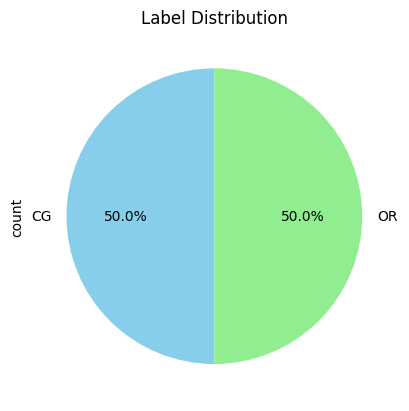

In [34]:
colors = ['skyblue', 'lightgreen']  
df['label'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors[:df['label'].nunique()]
)
plt.title('Label Distribution')
plt.show()

## Most Frequent Words in Fake Reviews

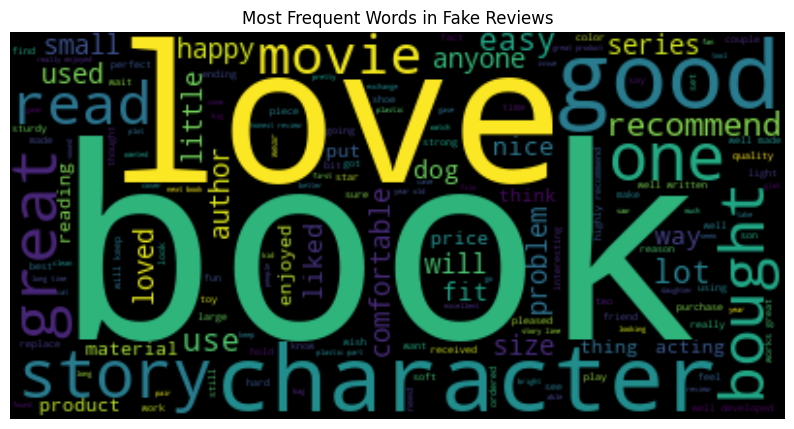

In [35]:
from wordcloud import WordCloud
fake_reviews = " ".join(df[df['label'] == 'CG']['text_'])
wordcloud = WordCloud().generate(fake_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Fake Reviews')
plt.show()

### The visualization of most frequent words in fake reviews is helpful because it can provide valuable insights into the nature of fake reviews

#  Rating distribution 

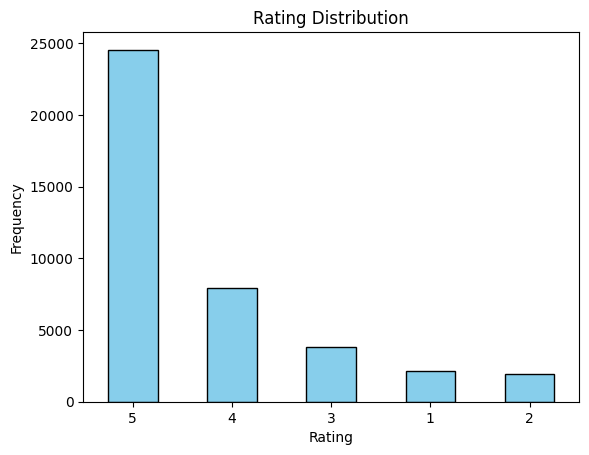

In [36]:
df['rating'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.xticks(rotation=0)
plt.show()

# Rating Distribution for just Fake Reviews

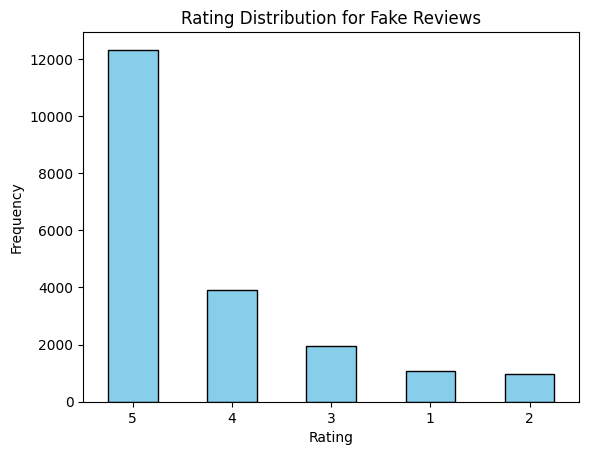

In [37]:
df[df['label'] == 'CG']['rating'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution for Fake Reviews')
plt.xticks(rotation=0)
plt.show()

## why fake Reviewer rating distribution is important 
- Identifying Rating Patterns in Fake Reviews
- Understanding Reviewer Behavior

In [38]:
# Add a new column to store the length of each review 
df['review_length'] = df['text_'].apply(len)

In [39]:
df.head()

,category,rating,label,text_,review_length
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",75
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",80
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,67
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",81
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,85


#  Preprocessing

##  1.Data Cleaning

In [40]:
# Check missing values
df.isnull().sum()

category         0
rating           0
label            0
text_            0
review_length    0
dtype: int64

### No any missing values

###  Removing duplicates and irrelevant data

In [41]:
# Drop the 'category' column 
df = df.drop(columns=['category'])

In [42]:
# Checking for duplicates
dub=df.duplicated().sum() 
print(dub)

12


In [43]:
# Removing duplicate rows
df= df.drop_duplicates()

In [44]:
# Remove the data where the text(Review) has fewer than 3 words
df = df[df['text_'].apply(lambda x: len(x.split()) >= 3)]

In [45]:
df.shape

(40417, 4)

## 2.Text Normalization

In [46]:
import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [47]:
# Download necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to C:\Users\Milan
[nltk_data]     Nagvadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Milan
[nltk_data]     Nagvadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Milan
[nltk_data]     Nagvadiya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [48]:
# Simplified data cleaning function
def data_cleaning(text):
    text = text.lower()  # Convert to lowercase
    text = contractions.fix(text)  # Expand contractions
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words or word == "not"]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize tokens
    return " ".join(tokens)  # Join tokens back into a string


In [49]:
df['cleaned_text'] = df['text_'].apply(data_cleaning)

# Word2Vec Model and Sentence Vectorization

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    min_df=1,
    max_df=0.8,
    use_idf=True,
    norm='l2'
)
vectorized_data = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Convert sparse matrix to dense and add to the dataset
df['x'] = list(vectorized_data.toarray())

## Lable encoding 

In [51]:
df['label'] = df['label'].map({'CG': 1, 'OR': 0})

In [52]:
df.head()

,rating,label,text_,review_length,cleaned_text,x
0,5,1,"Love this! Well made, sturdy, and very comfor...",75,love well made sturdy comfortable love itvery ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,5,1,"love it, a great upgrade from the original. I...",80,love great upgrade original mine couple year,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,5,1,This pillow saved my back. I love the look and...,67,pillow saved back love look feel pillow,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,1,"Missing information on how to use it, but it i...",81,missing information use great product price,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,5,1,Very nice set. Good quality. We have had the s...,85,nice set good quality set two month not,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [89]:
# Save the DataFrame 
df.to_csv('preprocessed datase.csv', index=False)